In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
print(sklearn.__version__)

1.0.2


In [2]:
speech = pd.read_csv("cleaned_speeches.csv")
speech.head()

,Date,President,Party,Title,Transcript
0,1829-03-04,Andrew Jackson,0,First Inaugural Address,Fellow Citizens: About to undertake the arduou...
1,1829-05-11,Andrew Jackson,0,Proclamation Regarding Duties on Austrian Vessels,Whereas by an act of the Congress of the Unite...
2,1829-12-08,Andrew Jackson,0,First Annual Message to Congress,Fellow citizens of the Senate and House of Rep...
3,1830-05-06,Andrew Jackson,0,Message Regarding Treaties with the Choctaw Na...,To the Senate of the United States. The accomp...
4,1830-05-27,Andrew Jackson,0,Veto Message Regarding Funding of Infrastructu...,To the House of Representatives. I have mature...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
vect = CountVectorizer()

In [5]:
vect.fit(speech.Transcript)

CountVectorizer()

In [6]:
len(vect.get_feature_names_out())

36645

In [7]:
speeches_num = vect.transform(speech.Transcript)

### Log Reg

In [10]:
y = speech.Party
X = speeches_num
X.shape, y.shape

((867, 36645), (867,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, shuffle=True, random_state=48)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((693, 36645), (174, 36645), (693,), (174,))

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression(random_state=48)

In [14]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 48,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
logreg.fit(X_train, y_train)

C:\Users\mauqu\Documents\Nieuwe map\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=48)

In [16]:
logreg.coef_

array([[ 0.02170053,  0.15100325,  0.00015238, ...,  0.00047205,
        -0.00072758, -0.00115274]])

### Eval

In [17]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [18]:
y_test_pred = logreg.predict(X_test)

In [19]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        87
           1       0.78      0.78      0.78        87

    accuracy                           0.78       174
   macro avg       0.78      0.78      0.78       174
weighted avg       0.78      0.78      0.78       174



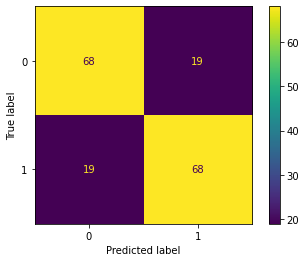

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred);